In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
%cd "/content/drive/MyDrive/Sam_McGill_Project_Team3/"
os.getcwd()

/content/drive/MyDrive/Sam_McGill_Project_Team3


'/content/drive/MyDrive/Sam_McGill_Project_Team3'

In [3]:
import math
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# df_Buildings_geo_NAD83

Source:
montreal_dataset/montreal_dataset_v1.geojson
https://ngci.encs.concordia.ca/gitea/CERC/montreal_dataset/src/branch/main/montreal_dataset_v1.geojson

montreal_dataset/README.md
https://ngci.encs.concordia.ca/gitea/CERC/montreal_dataset/src/branch/main/README.md

In [4]:
montreal_dataset_v1_geojson_file_path = 'montreal_dataset_v1.geojson'

montreal_dataset_v1_geojson_gpd = gpd.read_file(montreal_dataset_v1_geojson_file_path)

In [5]:
montreal_dataset_v1_geojson_gpd.head()

,OBJECTID,OBJECTID_1,OBJECTID_12,Z_Min,Z_Max,Z_Mean,OBJECTID_12_13,ID_UEV,CIVIQUE_DE,CIVIQUE_FI,...,OBJECTID_12_13_14_15_16,Join_Count_1,TARGET_FID_1,Shape_Leng_1,Shape_Area_1,MERGE_SRC,NewHieght,Shape_Length,Shape_Area,geometry
0,1,1,1,24.80,36.73,32.352872,1,02005824,,,...,,,,,,,11,0.001077,3.134820e-08,"MULTIPOLYGON (((-73.59561 45.63646, -73.59559 ..."
1,2,2,2,28.44,38.25,36.507502,3,02004842,,,...,,,,,,,9,0.000400,9.041729e-09,"POLYGON ((-73.59498 45.63274, -73.59492 45.632..."
2,3,3,3,34.01,39.63,38.247460,6,02165993,,,...,,,,,,,6,0.001589,5.662433e-08,"MULTIPOLYGON (((-73.58287 45.61064, -73.58287 ..."
3,4,4,4,15.10,23.66,21.400652,14,02010529,,,...,,,,,,,8,0.000639,2.213876e-08,"POLYGON ((-73.57059 45.65817, -73.57044 45.658..."
4,5,5,5,45.83,54.47,52.790334,16,02083902,,,...,,,,,,,9,0.000558,1.637121e-08,"MULTIPOLYGON (((-73.58819 45.57884, -73.58818 ..."


In [6]:
montreal_dataset_v1_geojson_gpd.columns

Index(['OBJECTID', 'OBJECTID_1', 'OBJECTID_12', 'Z_Min', 'Z_Max', 'Z_Mean',
       'OBJECTID_12_13', 'ID_UEV', 'CIVIQUE_DE', 'CIVIQUE_FI', 'NOM_RUE',
       'SUITE_DEBU', 'MUNICIPALI', 'ETAGE_HORS', 'NOMBRE_LOG', 'ANNEE_CONS',
       'CODE_UTILI', 'LETTRE_DEB', 'LETTRE_FIN', 'LIBELLE_UT', 'CATEGORIE_',
       'MATRICULE8', 'SUPERFICIE', 'SUPERFIC_1', 'NO_ARROND_', 'Shape_Leng',
       'OBJECTID_2', 'Join_Count', 'TARGET_FID', 'feature_id', 'md_id',
       'acqtech', 'acqtech_en', 'acqtech_fr', 'provider', 'provideren',
       'providerfr', 'datemin', 'datemax', 'haccmin', 'haccmax', 'vaccmin',
       'vaccmax', 'heightmin', 'heightmax', 'elevmin', 'elevmax', 'bldgarea',
       'comment', 'OBJECTID_3', 'Shape_Le_1', 'Shape_Ar_1', 'OBJECTID_4',
       'Join_Cou_1', 'TARGET_F_1', 'g_objectid', 'g_co_mrc', 'g_code_mun',
       'g_arrond', 'g_anrole', 'g_usag_pre', 'g_no_lot', 'g_nb_poly_',
       'g_utilisat', 'g_nb_logem', 'g_nb_locau', 'g_descript', 'g_id_provi',
       'g_sup_tota', 'g_

In [7]:
for col in montreal_dataset_v1_geojson_gpd.columns:
    print(col,"---",type(montreal_dataset_v1_geojson_gpd[col][0]),"---",montreal_dataset_v1_geojson_gpd[col][0])

OBJECTID --- <class 'numpy.int32'> --- 1
OBJECTID_1 --- <class 'numpy.int32'> --- 1
OBJECTID_12 --- <class 'numpy.int32'> --- 1
Z_Min --- <class 'numpy.float64'> --- 24.8
Z_Max --- <class 'numpy.float64'> --- 36.73
Z_Mean --- <class 'numpy.float64'> --- 32.3528718951
OBJECTID_12_13 --- <class 'numpy.int32'> --- 1
ID_UEV --- <class 'str'> --- 02005824
CIVIQUE_DE --- <class 'str'> --- 
CIVIQUE_FI --- <class 'str'> --- 
NOM_RUE --- <class 'str'> --- boulevard Armand-Bombardier  (MTL)
SUITE_DEBU --- <class 'str'> --- 
MUNICIPALI --- <class 'str'> --- 50
ETAGE_HORS --- <class 'numpy.int32'> --- 2
NOMBRE_LOG --- <class 'numpy.int32'> --- 0
ANNEE_CONS --- <class 'numpy.int32'> --- 1977
CODE_UTILI --- <class 'str'> --- 1000
LETTRE_DEB --- <class 'str'> --- 
LETTRE_FIN --- <class 'str'> --- 
LIBELLE_UT --- <class 'str'> --- Logement
CATEGORIE_ --- <class 'str'> --- Régulier
MATRICULE8 --- <class 'str'> --- 9755-31-6579-2-000-0000
SUPERFICIE --- <class 'numpy.int32'> --- 0
SUPERFIC_1 --- <class 

In [8]:
print(montreal_dataset_v1_geojson_gpd.dtypes)

OBJECTID           int32
OBJECTID_1         int32
OBJECTID_12        int32
Z_Min            float64
Z_Max            float64
                  ...   
MERGE_SRC         object
NewHieght          int32
Shape_Length     float64
Shape_Area       float64
geometry        geometry
Length: 88, dtype: object


In [9]:
montreal_dataset_v1_geojson_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 480243 entries, 0 to 480242
Data columns (total 88 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   OBJECTID                 480243 non-null  int32   
 1   OBJECTID_1               480243 non-null  int32   
 2   OBJECTID_12              480243 non-null  int32   
 3   Z_Min                    480243 non-null  float64 
 4   Z_Max                    480243 non-null  float64 
 5   Z_Mean                   480243 non-null  float64 
 6   OBJECTID_12_13           480243 non-null  int32   
 7   ID_UEV                   480243 non-null  object  
 8   CIVIQUE_DE               480243 non-null  object  
 9   CIVIQUE_FI               480243 non-null  object  
 10  NOM_RUE                  480243 non-null  object  
 11  SUITE_DEBU               480243 non-null  object  
 12  MUNICIPALI               480243 non-null  object  
 13  ETAGE_HORS               480243 non-

In [10]:
montreal_dataset_v1_geojson_gpd.shape

(480243, 88)

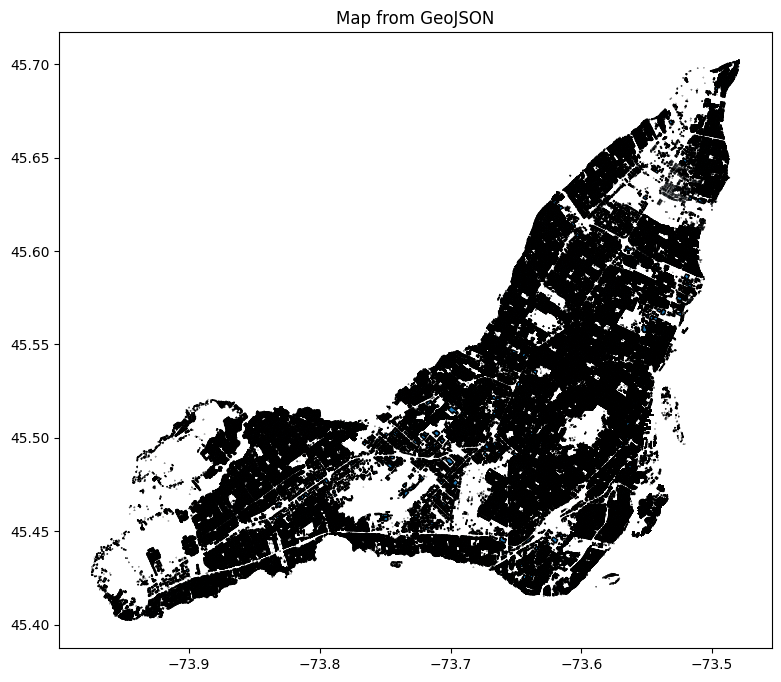

In [11]:
# Plot
montreal_dataset_v1_geojson_gpd.plot(figsize=(10, 8), edgecolor='black')
plt.title("Map from GeoJSON")
plt.show()

# montreal_admn_lmt_geo_NAD83

Source: administrative-limits-agglomeration-nad83

In [13]:
geojson_file_path = 'administrative-limits-agglomeration-nad83.geojson'
#geojson_file_path = 'limites-administratives-agglomeration-nad83 (2).geojson'
montreal_admn_lmt_geo_NAD83 = gpd.read_file(geojson_file_path)

# Display the first few rows of the GeoDataFrame
display(montreal_admn_lmt_geo_NAD83.head(5))

,CODEID,NOM,NOM_OFFICIEL,CODEMAMH,CODE_3C,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,10,LaSalle,LaSalle,REM17,LAS,18,LS,Arrondissement,None,2023-11-29,"MULTIPOLYGON (((291800.968 5031331.566, 291862..."
1,3,Dollard-des-Ormeaux,Dollard-des-Ormeaux,66142,DDO,11,DO,Ville liée,None,2023-11-29,"MULTIPOLYGON (((277698.951 5035907.484, 277740..."
2,27,Côte-Saint-Luc,Côte-Saint-Luc,66058,CSL,72,CL,Ville liée,None,2023-11-29,"MULTIPOLYGON (((290504.379 5035932.981, 290622..."
3,19,Villeray-Saint-Michel-Parc-Extension,Villeray–Saint-Michel–Parc-Extension,REM25,VSE,26,VS,Arrondissement,None,2023-11-29,"MULTIPOLYGON (((295365.304 5042644.191, 295372..."
4,18,Rosemont-La Petite-Patrie,Rosemont–La Petite-Patrie,REM24,RPP,25,RO,Arrondissement,None,2023-11-29,"MULTIPOLYGON (((299454.771 5049061.793, 299454..."


In [14]:
# cleaning up the map data (geometry column in the montreal_admn_lmt_geo_NAD83 dataset)
montreal_admn_lmt_geo_NAD83['geometry']=montreal_admn_lmt_geo_NAD83.buffer(0)

In [15]:
# Changes the map's coordinate system to a specific Quebec standard (EPSG:32188)
montreal_admn_lmt_geo_NAD83=montreal_admn_lmt_geo_NAD83.to_crs(epsg=32188)

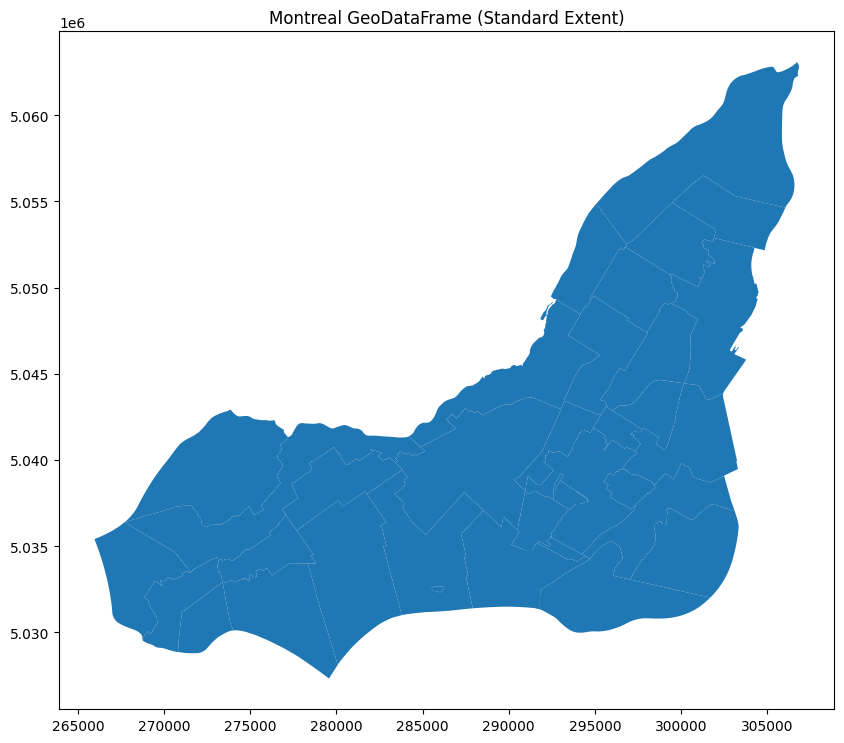

In [ ]:
# Recommended standard plot:
montreal_admn_lmt_geo_NAD83.plot(figsize=(10, 10))
plt.title("Montreal GeoDataFrame (Standard Extent)")
plt.show()

In [16]:
# Merges all Montreal geographic shapes into one.
montreal_admn_lmt_geo_NAD83_gmtr = unary_union(montreal_admn_lmt_geo_NAD83.geometry)

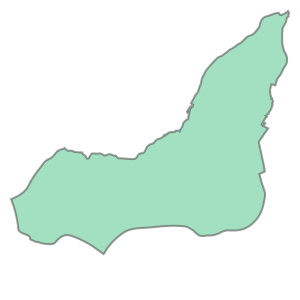

In [17]:
montreal_admn_lmt_geo_NAD83_gmtr

# Create FishNet/Grid for the geographic area of Montreal

In [18]:
#This function creates a grid (fishnet) over a geographic area
def make_fishnet(polygon, cell_size_m=10000, buffer_m=0):
    # Applies an optional buffer (outlining/expansion) to the input area.
    poly = polygon.buffer(buffer_m) if buffer_m != 0 else polygon
    # Finds the bounding box (min/max coordinates) of the area.
    minx, miny, maxx, maxy = poly.bounds

    # Calculates the required number of grid columns and rows based on the cell size.
    n_cols = math.ceil((maxx - minx) / cell_size_m)
    n_rows = math.ceil((maxy - miny) / cell_size_m)

    # Loops through all possible grid cells within the bounding box.
    cells = []
    for r in range(n_rows):
        y1 = miny + r * cell_size_m
        y2 = y1 + cell_size_m
        for c in range(n_cols):
            x1 = minx + c * cell_size_m
            x2 = x1 + cell_size_m
            # Creates a single square grid cell.
            cell = box(x1, y1, x2, y2)
            # Clips the cell to the exact boundary of the input area (e.g., if the area is round).
            if cell.intersects(poly):
                cells.append((r, c, cell.intersection(poly)))

    # Saves the resulting clipped cells into a GeoDataFrame (a table with map data).
    gdf = gpd.GeoDataFrame(cells, columns=["row", "col", "geometry"], crs="EPSG:32188")

    # Attributes - Calculates the area in square kilometers for each clipped cell.
    gdf["area_km2"] = gdf.geometry.area / 1e6

    # fix by Sam based on Gemini input to remove the warning
    # [PART 1 - code commented]
    '''
    # old code
    gdf["cx_mtm8"] = gdf.geometry.centroid.x
    gdf["cy_mtm8"] = gdf.geometry.centroid.y

    # Centroids in WGS84 - Converts coordinates to the common WGS84 standard (Latitude/Longitude).
    gdf_ll = gdf.to_crs(4326)

    # Calculates the center point (centroid) latitude and longitude for each cell.
    gdf["lon"] = gdf_ll.geometry.centroid.x
    gdf["lat"] = gdf_ll.geometry.centroid.y
    '''
    # fix by Sam based on Gemini input to remove the warning
    # [PART 2 - new code to replace the above commented code]
    # --- Start of Centroid Calculation Fix ---

    # 1. Calculate Centroids in the Projected CRS (MTM8/EPSG:32188)
    #    This is the accurate calculation.
    gdf["cx_mtm8"] = gdf.geometry.centroid.x
    gdf["cy_mtm8"] = gdf.geometry.centroid.y

    # 2. Create a new GeoDataFrame of the centroid points using the accurate MTM8 coordinates
    centroids_gdf = gpd.GeoDataFrame(
        gdf.index,
        geometry=gpd.points_from_xy(gdf["cx_mtm8"], gdf["cy_mtm8"], crs="EPSG:32188")
    )

    # 3. Convert the centroid points from MTM8 to WGS 84 (Lat/Lon)
    centroids_wgs84 = centroids_gdf.to_crs(epsg=4326)

    # 4. Extract the correct WGS 84 coordinates (lon/lat) from the reprojected points
    gdf["lon"] = centroids_wgs84.geometry.x
    gdf["lat"] = centroids_wgs84.geometry.y

    # --- End of Centroid Calculation Fix ---

    # Creates a unique ID for each cell using its row and column number.
    # ... (lines after this remain the same)

    # Creates a unique ID for each cell using its row and column number.
    gdf["cell_id"] = gdf["row"].astype(str) + "_" + gdf["col"].astype(str)
    return gdf[["cell_id","row","col","lat","lon","cx_mtm8","cy_mtm8","area_km2","geometry"]]

In [19]:
minx, miny, maxx, maxy = montreal_admn_lmt_geo_NAD83_gmtr.bounds
width = (maxx-minx)/1000.0
length = (maxy-miny)/1000.0
print("width=", width, "KM, length=",length," KM")

width= 40.873781799999996 KM, length= 35.753721808160655  KM


Fishnet Grid Created: 142 cells (approximate).

First 5 cells:
  cell_id  row  col        lat        lon        cx_mtm8       cy_mtm8  \
0     0_1    0    1  45.399943 -73.949352  269620.860919  5.028988e+06   
1     0_2    0    2  45.398764 -73.923396  271652.252445  5.028846e+06   
2     0_3    0    3  45.401861 -73.902327  273303.510146  5.029181e+06   
3     0_4    0    4  45.399112 -73.853734  277106.270036  5.028858e+06   
4     0_5    0    5  45.393847 -73.826166  279262.193347  5.028264e+06   

   area_km2                                           geometry  
0  1.259885  POLYGON ((270461.235 5029324.487, 270461.235 5...  
1  2.349974  POLYGON ((270461.235 5029324.487, 272961.235 5...  
2  0.117764  MULTIPOLYGON (((275461.235 5029324.487, 275461...  
3  1.793211  POLYGON ((275461.235 5029324.487, 277961.235 5...  
4  5.176425  POLYGON ((277961.235 5029324.487, 280461.235 5...  


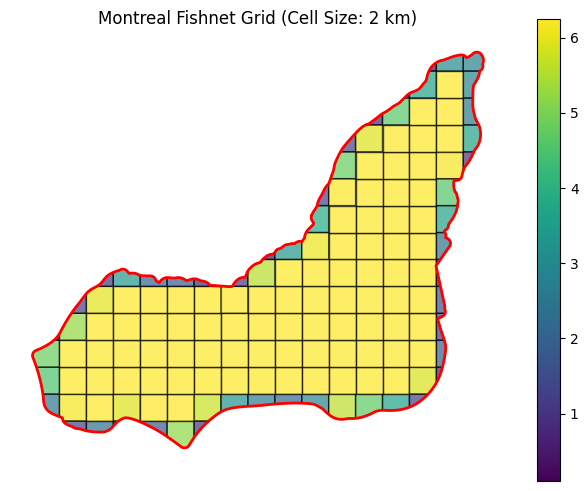

In [22]:
CELL_SIZE = 2500 # 5000 - 1000 meters = 1 km
BUFFER_SIZE = 500 # 500 / Add a 500m buffer around the island

fishnet_grid_gdf = make_fishnet(polygon=montreal_admn_lmt_geo_NAD83_gmtr,cell_size_m=CELL_SIZE, buffer_m=BUFFER_SIZE)

# 3. Print summary and visualize
print(f"Fishnet Grid Created: {len(fishnet_grid_gdf)} cells (approximate).")
print("\nFirst 5 cells:")
print(fishnet_grid_gdf.head())

# Visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fishnet_grid_gdf.plot(ax=ax, edgecolor='black', column='area_km2', legend=True,
                      cmap='viridis', alpha=0.7)

# Overlay the original buffered polygon boundary
gpd.GeoSeries([montreal_admn_lmt_geo_NAD83_gmtr.buffer(BUFFER_SIZE)]).plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

ax.set_title(f"Montreal Fishnet Grid (Cell Size: {CELL_SIZE/1000:.0f} km)")
ax.set_axis_off()
plt.show()

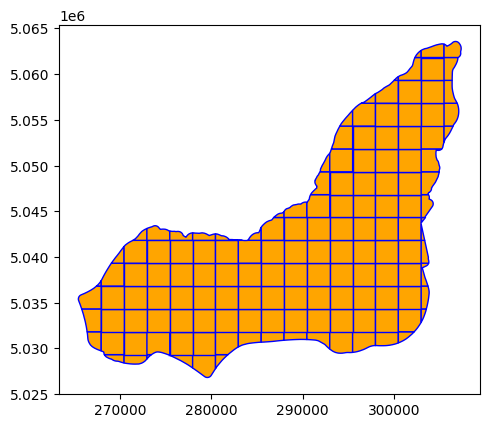

In [23]:
fishnet_grid_gdf.plot(color='orange',edgecolor='blue')
plt.show()

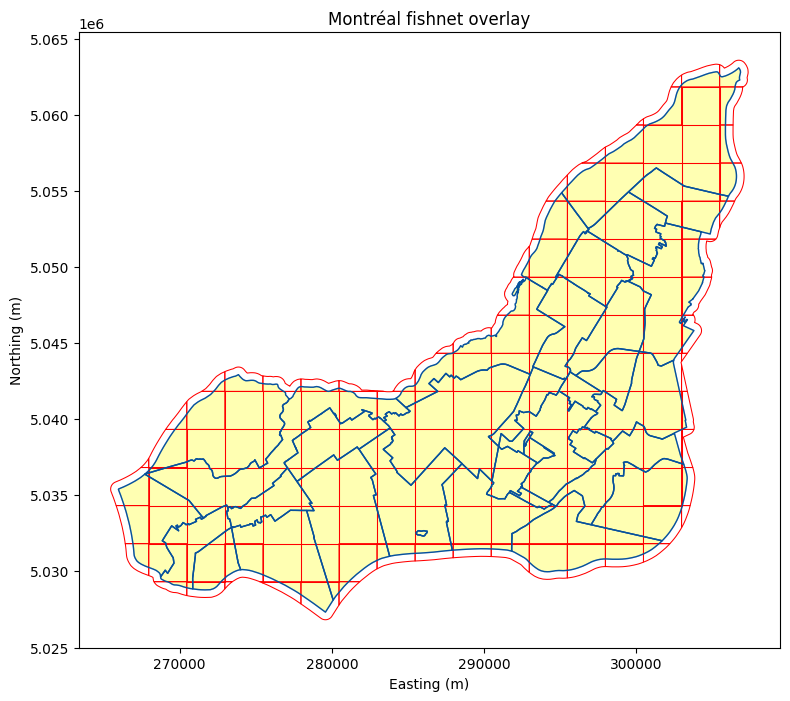

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))

# Montréal gdf
montreal_admn_lmt_geo_NAD83.plot(ax=ax, facecolor="#ffff00", edgecolor="#3182bd", alpha=0.3 ) # facecolor="d9f0ff"
montreal_admn_lmt_geo_NAD83.boundary.plot(ax=ax, color="#08519c", linewidth=1)

# Fishnet
fishnet_grid_gdf.plot(ax=ax, facecolor="none", edgecolor="#ff0000", linewidth=0.75)

ax.set_title("Montréal fishnet overlay")
ax.set_aspect("equal")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
plt.tight_layout()
plt.show()

# df_Fire_Final / sim_combined_df

In [88]:
#df_Fire = pd.read_csv('/content/sim_combined_df.csv', engine='python')
df_Fire = pd.read_csv('sim_combined_df.csv', engine='python')
display(df_Fire.head())

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,CREATION_DATE_FIXED,NOM_ARROND_2,YearMonth,Month,Year,DayOfWeek,"CREATION_DATE_FIXED"""
0,20074,2018/02/22,Alarme privé ou locale,Alarmes-incendies,20,Montréal,Ville-Marie,6,4.0,300599.1,5041118.2,-73.553764,45.509971,2018-02-22,Ville-Marie,2018-02,2,2018,3,2018-02-22
1,45534,2018/05/10,Déchets en feu,AUTREFEU,55,Pointe-Claire,Indéterminé,2,1.0,281760.2,5035568.6,-73.794604,45.459666,2018-05-10,Pointe-Claire,2018-05,5,2018,3,2018-05-10
2,53654,2018/06/02,Appel de Cie de détection,Alarmes-incendies,5,Montréal,Ville-Marie,6,3.0,299523.5,5040741.7,-73.567526,45.506577,2018-06-02,Ville-Marie,2018-06,6,2018,5,2018-06-02
3,54060,2018/06/03,Alarme privé ou locale,Alarmes-incendies,19,Montréal,Ville-Marie,6,3.0,300950.6,5042619.3,-73.549277,45.523481,2018-06-03,Ville-Marie,2018-06,6,2018,6,2018-06-03
4,60405,2018/06/20,Appel de Cie de détection,Alarmes-incendies,76,Westmount,Indéterminé,14,3.0,297496.4,5039104.8,-73.593442,45.491828,2018-06-20,Westmount,2018-06,6,2018,2,2018-06-20


In [89]:
df_Fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395971 entries, 0 to 395970
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   INCIDENT_NBR          395971 non-null  int64  
 1   CREATION_DATE_TIME    395971 non-null  object 
 2   INCIDENT_TYPE_DESC    395971 non-null  object 
 3   DESCRIPTION_GROUPE    395971 non-null  object 
 4   CASERNE               395971 non-null  int64  
 5   NOM_VILLE             395971 non-null  object 
 6   NOM_ARROND            395971 non-null  object 
 7   DIVISION              395971 non-null  int64  
 8   NOMBRE_UNITES         395971 non-null  float64
 9   MTM8_X                197201 non-null  float64
 10  MTM8_Y                197201 non-null  float64
 11  LONGITUDE             395971 non-null  float64
 12  LATITUDE              395971 non-null  float64
 13  CREATION_DATE_FIXED   395971 non-null  object 
 14  NOM_ARROND_2          395971 non-null  object 
 15  

In [90]:
# below two column are identical
print("count of different records ", sum(df_Fire['CREATION_DATE_FIXED']!=df_Fire['CREATION_DATE_FIXED"']),"\n",
      "count of identical records ", sum(df_Fire['CREATION_DATE_FIXED']==df_Fire['CREATION_DATE_FIXED"']),"\n",
      "Total # of records: ", df_Fire.shape[0])

count of different records  0 
 count of identical records  395971 
 Total # of records:  395971


In [41]:
#df_Fire = df_Fire.drop(columns=['CREATION_DATE_FIXED"'])

In [91]:
df_Fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395971 entries, 0 to 395970
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   INCIDENT_NBR          395971 non-null  int64  
 1   CREATION_DATE_TIME    395971 non-null  object 
 2   INCIDENT_TYPE_DESC    395971 non-null  object 
 3   DESCRIPTION_GROUPE    395971 non-null  object 
 4   CASERNE               395971 non-null  int64  
 5   NOM_VILLE             395971 non-null  object 
 6   NOM_ARROND            395971 non-null  object 
 7   DIVISION              395971 non-null  int64  
 8   NOMBRE_UNITES         395971 non-null  float64
 9   MTM8_X                197201 non-null  float64
 10  MTM8_Y                197201 non-null  float64
 11  LONGITUDE             395971 non-null  float64
 12  LATITUDE              395971 non-null  float64
 13  CREATION_DATE_FIXED   395971 non-null  object 
 14  NOM_ARROND_2          395971 non-null  object 
 15  

In [92]:
df_Fire_final = df_Fire.rename(columns={'LATITUDE':'latitude', 'LONGITUDE':'longitude'})
df_Fire_final.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,longitude,latitude,CREATION_DATE_FIXED,NOM_ARROND_2,YearMonth,Month,Year,DayOfWeek,"CREATION_DATE_FIXED"""
0,20074,2018/02/22,Alarme privé ou locale,Alarmes-incendies,20,Montréal,Ville-Marie,6,4.0,300599.1,5041118.2,-73.553764,45.509971,2018-02-22,Ville-Marie,2018-02,2,2018,3,2018-02-22
1,45534,2018/05/10,Déchets en feu,AUTREFEU,55,Pointe-Claire,Indéterminé,2,1.0,281760.2,5035568.6,-73.794604,45.459666,2018-05-10,Pointe-Claire,2018-05,5,2018,3,2018-05-10
2,53654,2018/06/02,Appel de Cie de détection,Alarmes-incendies,5,Montréal,Ville-Marie,6,3.0,299523.5,5040741.7,-73.567526,45.506577,2018-06-02,Ville-Marie,2018-06,6,2018,5,2018-06-02
3,54060,2018/06/03,Alarme privé ou locale,Alarmes-incendies,19,Montréal,Ville-Marie,6,3.0,300950.6,5042619.3,-73.549277,45.523481,2018-06-03,Ville-Marie,2018-06,6,2018,6,2018-06-03
4,60405,2018/06/20,Appel de Cie de détection,Alarmes-incendies,76,Westmount,Indéterminé,14,3.0,297496.4,5039104.8,-73.593442,45.491828,2018-06-20,Westmount,2018-06,6,2018,2,2018-06-20


In [93]:
df_Fire_geo_WGS84=gpd.GeoDataFrame(
    df_Fire_final,
    geometry=gpd.points_from_xy(df_Fire_final["longitude"],df_Fire_final["latitude"]),
    crs=4326
    )

# CRS conversion

In [94]:
montreal_admn_lmt_geo_NAD83.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [95]:
montreal_dataset_v1_geojson_gpd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
df_Buildings_geo_NAD83 = montreal_dataset_v1_geojson_gpd.to_crs(montreal_admn_lmt_geo_NAD83.crs)

df_Buildings_geo_NAD83.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [97]:
df_Buildings_geo_NAD83.head()

,OBJECTID,OBJECTID_1,OBJECTID_12,Z_Min,Z_Max,Z_Mean,OBJECTID_12_13,ID_UEV,CIVIQUE_DE,CIVIQUE_FI,...,OBJECTID_12_13_14_15_16,Join_Count_1,TARGET_FID_1,Shape_Leng_1,Shape_Area_1,MERGE_SRC,NewHieght,Shape_Length,Shape_Area,geometry
0,1,1,1,24.80,36.73,32.352872,1,02005824,,,...,,,,,,,11,0.001077,3.134820e-08,"MULTIPOLYGON (((297346.05 5055178.373, 297347...."
1,2,2,2,28.44,38.25,36.507502,3,02004842,,,...,,,,,,,9,0.000400,9.041729e-09,"POLYGON ((297395.103 5054764.59, 297399.577 50..."
2,3,3,3,34.01,39.63,38.247460,6,02165993,,,...,,,,,,,6,0.001589,5.662433e-08,"MULTIPOLYGON (((298336.261 5052307.241, 298336..."
3,4,4,4,15.10,23.66,21.400652,14,02010529,,,...,,,,,,,8,0.000639,2.213876e-08,"POLYGON ((299298.96 5057588.857, 299310.207 50..."
4,5,5,5,45.83,54.47,52.790334,16,02083902,,,...,,,,,,,9,0.000558,1.637121e-08,"MULTIPOLYGON (((297917.915 5048773.62, 297917...."


# Building as points NOT as Polygons

In [98]:
# recently modified (14-OCT-2025)
# project to NAD83 / MTM 8 for accurate geometry ops
#gdf_proj = df_Buildings_geo_NAD83.to_crs(2950)  # or 32188 if data is EPSG:4326 (WGS 84)

# pick a stable point inside each polygon
pts_proj = df_Buildings_geo_NAD83.representative_point()   # stays inside; better than centroid for concave shapes
pts_ll   = pts_proj.to_crs(4326)  # back to lon/lat

df_Buildings_geo_NAD83["cntr_longitude"] = pts_ll.x
df_Buildings_geo_NAD83["cntr_latitude"]  = pts_ll.y

In [99]:
# recently modified (14-OCT-2025)
import geopandas as gpd
from shapely.geometry import Point

# Assume df_Buildings_geo_NAD83 is the DataFrame.
# Its main geometry column is in NAD83 (e.g., EPSG:32188).
# The Lat/Lon columns are 'cntr_longitude' and 'cntr_latitude' (in EPSG:4326).

# 1. Define the target NAD83 CRS (Easting/Northing)
# We assume the main geometry and the fishnet grid are both in EPSG:32188.
TARGET_CRS = 'EPSG:32188'

# 2. Create a GeoSeries of Points from the Lat/Lon columns
# IMPORTANT: The CRS must be set to 4326 (WGS 84) to tell GeoPandas what these numbers mean.
points_4326 = gpd.GeoSeries(
    [Point(lon, lat) for lon, lat in zip(
        df_Buildings_geo_NAD83['cntr_longitude'],
        df_Buildings_geo_NAD83['cntr_latitude']
    )],
    crs='EPSG:4326'
)

# 3. Reproject the points to the NAD83 target CRS
# This performs the mathematical conversion from degrees to meters.
points_nad83 = points_4326.to_crs(TARGET_CRS)

# 4. Add the new NAD83 coordinates (Easting/Northing) to the DataFrame
df_Buildings_geo_NAD83['cntr_easting_nad83'] = points_nad83.x    # Easting (X) in meters
df_Buildings_geo_NAD83['cntr_northing_nad83'] = points_nad83.y  # Northing (Y) in meters

# 5. Optional: Create a new geometry column using the NAD83 points for the spatial join
df_Buildings_geo_NAD83['nad83_point_geom'] = points_nad83

In [100]:
df_Buildings_geo_NAD83.head()

,OBJECTID,OBJECTID_1,OBJECTID_12,Z_Min,Z_Max,Z_Mean,OBJECTID_12_13,ID_UEV,CIVIQUE_DE,CIVIQUE_FI,...,MERGE_SRC,NewHieght,Shape_Length,Shape_Area,geometry,cntr_longitude,cntr_latitude,cntr_easting_nad83,cntr_northing_nad83,nad83_point_geom
0,1,1,1,24.80,36.73,32.352872,1,02005824,,,...,,11,0.001077,3.134820e-08,"MULTIPOLYGON (((297346.05 5055178.373, 297347....",-73.595354,45.636468,297366.114845,5.055179e+06,POINT (297366.115 5055179.028)
1,2,2,2,28.44,38.25,36.507502,3,02004842,,,...,,9,0.000400,9.041729e-09,"POLYGON ((297395.103 5054764.59, 297399.577 50...",-73.594893,45.632740,297401.535728,5.054765e+06,POINT (297401.536 5054764.709)
2,3,3,3,34.01,39.63,38.247460,6,02165993,,,...,,6,0.001589,5.662433e-08,"MULTIPOLYGON (((298336.261 5052307.241, 298336...",-73.582749,45.610636,298345.846179,5.052307e+06,POINT (298345.846 5052307.092)
3,4,4,4,15.10,23.66,21.400652,14,02010529,,,...,,8,0.000639,2.213876e-08,"POLYGON ((299298.96 5057588.857, 299310.207 50...",-73.570467,45.658127,299308.412083,5.057584e+06,POINT (299308.412 5057583.998)
4,5,5,5,45.83,54.47,52.790334,16,02083902,,,...,,9,0.000558,1.637121e-08,"MULTIPOLYGON (((297917.915 5048773.62, 297917....",-73.588148,45.578973,297920.870056,5.048789e+06,POINT (297920.87 5048788.792)


In [101]:
'''
print(df_Buildings_geo_NAD83.loc[0]['geometry'],
      "\n",df_Buildings_geo_NAD83.loc[0]['cntr_longitude'],
      "\n",df_Buildings_geo_NAD83.loc[0]['cntr_latitude'])
'''

'\nprint(df_Buildings_geo_NAD83.loc[0][\'geometry\'],\n      "\n",df_Buildings_geo_NAD83.loc[0][\'cntr_longitude\'],\n      "\n",df_Buildings_geo_NAD83.loc[0][\'cntr_latitude\'])\n'

In [102]:
# TO START WITH (14-OCT-2025) - # below code is commented -

# Assuming fishnet_grid_gdf is the fishnet in NAD83 (EPSG:32188)

# Create a temporary GeoDataFrame for the points, using the NAD83 point geometry
buildings_points_gdf = gpd.GeoDataFrame(
    df_Buildings_geo_NAD83.drop(columns=['geometry']), # Drop the polygon geometry
    geometry='nad83_point_geom',                      # Use the new NAD83 point geometry
    crs=TARGET_CRS
)

# Perform the Spatial Join
points_in_grid = gpd.sjoin(
    buildings_points_gdf,
    fishnet_grid_gdf,
    how="left",
    predicate='within'
)

# Create maps and check CRS used for each dataset

/tmp/ipython-input-1023373625.py:5: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  buildings_points_gdf.boundary.plot(ax=ax, color="#08519c", linewidth=1)


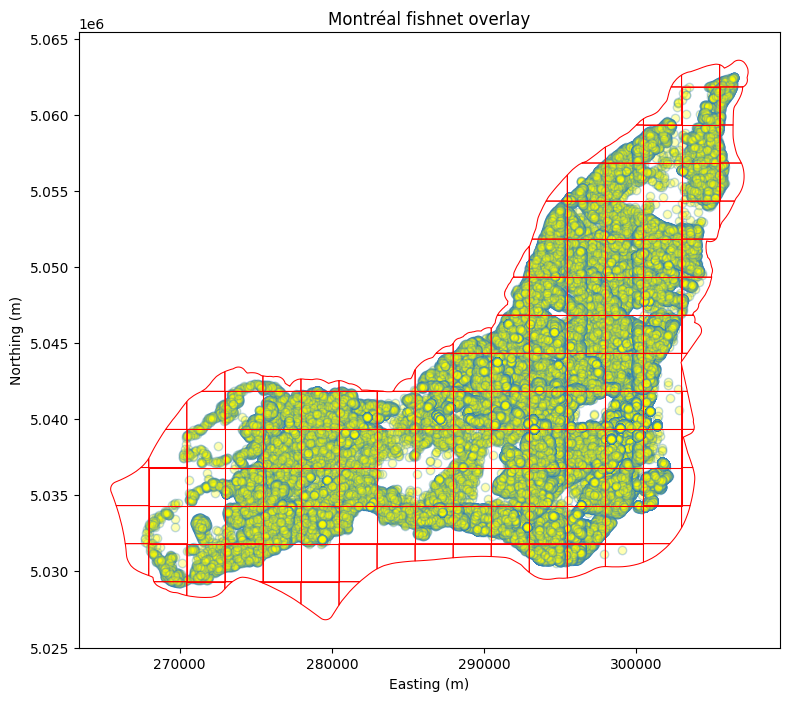

In [103]:
fig, ax = plt.subplots(figsize=(8, 8))

# Montréal gdf
buildings_points_gdf.plot(ax=ax, facecolor="#ffff00", edgecolor="#3182bd", alpha=0.3 ) # facecolor="d9f0ff"
buildings_points_gdf.boundary.plot(ax=ax, color="#08519c", linewidth=1)

# Fishnet
fishnet_grid_gdf.plot(ax=ax, facecolor="none", edgecolor="#ff0000", linewidth=0.75)

ax.set_title("Montréal fishnet overlay")
ax.set_aspect("equal")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
plt.tight_layout()
plt.show()

In [104]:
fishnet_grid_gdf.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [105]:
df_Fire_geo_WGS84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [106]:
df_Fire_geo_NAD83 = df_Fire_geo_WGS84.to_crs(montreal_admn_lmt_geo_NAD83.crs)
df_Fire_geo_NAD83.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [107]:
buildings_points_gdf.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

/tmp/ipython-input-86365177.py:5: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  df_Fire_geo_NAD83.boundary.plot(ax=ax, color="#08519c", linewidth=1)


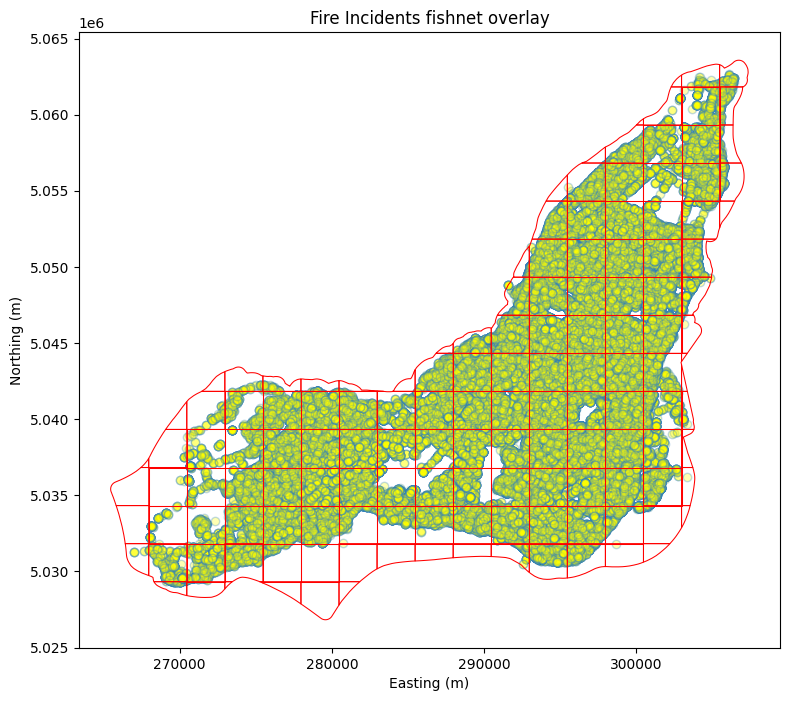

In [108]:
fig, ax = plt.subplots(figsize=(8, 8))

# Montréal gdf
df_Fire_geo_NAD83.plot(ax=ax, facecolor="#ffff00", edgecolor="#3182bd", alpha=0.3 ) # facecolor="d9f0ff"
df_Fire_geo_NAD83.boundary.plot(ax=ax, color="#08519c", linewidth=1)

# Fishnet
fishnet_grid_gdf.plot(ax=ax, facecolor="none", edgecolor="#ff0000", linewidth=0.75)

ax.set_title("Fire Incidents fishnet overlay")
ax.set_aspect("equal")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
plt.tight_layout()
plt.show()

In [109]:
print(
    "df_Fire_geo_NAD83.crs : ", df_Fire_geo_NAD83.crs,
    #"\ndf_Buildings_geo_NAD83.crs : ", df_Buildings_geo_NAD83.crs,
    "\nbuildings_points_gdf.crs : ", buildings_points_gdf.crs,
    "\nmontreal_admn_lmt_geo_NAD83.crs : ",montreal_admn_lmt_geo_NAD83.crs,
    "\nfishnet_grid_gdf.crs : ", fishnet_grid_gdf.crs)

df_Fire_geo_NAD83.crs :  EPSG:32188 
buildings_points_gdf.crs :  EPSG:32188 
montreal_admn_lmt_geo_NAD83.crs :  EPSG:32188 
fishnet_grid_gdf.crs :  EPSG:32188


# sjoin

In [110]:
'''
# best
df_Bldgs_leftWithin_fshNetGrd_geo = gpd.sjoin(
    df_Buildings_geo_NAD83,fishnet_grid_gdf, how="left", predicate="within")

# good alternative
df_fshNetGrd_leftContains_Bldgs_geo = gpd.sjoin(
    fishnet_grid_gdf,df_Buildings_geo_NAD83, how="left", predicate="contains")

# below is not recommended - as we lose empty grid cells for visualization.
#
df_Bldgs_innerWithin_fshNetGrd_geo = df_Buildings_geo_NAD83.sjoin(
    fishnet_grid_gdf, how="inner", predicate="within")
#

print("df_Bldgs_leftWithin_fshNetGrd_geo: ", df_Bldgs_leftWithin_fshNetGrd_geo.shape[0],
      "\ndf_fshNetGrd_leftContains_Bldgs_geo: ", df_fshNetGrd_leftContains_Bldgs_geo.shape[0],
      "\ndf_Bldgs_innerWithin_fshNetGrd_geo: ", df_Bldgs_innerWithin_fshNetGrd_geo.shape[0])
'''

'\n# best\ndf_Bldgs_leftWithin_fshNetGrd_geo = gpd.sjoin(\n    df_Buildings_geo_NAD83,fishnet_grid_gdf, how="left", predicate="within")\n\n# good alternative\ndf_fshNetGrd_leftContains_Bldgs_geo = gpd.sjoin(\n    fishnet_grid_gdf,df_Buildings_geo_NAD83, how="left", predicate="contains")\n\n# below is not recommended - as we lose empty grid cells for visualization.\n#\ndf_Bldgs_innerWithin_fshNetGrd_geo = df_Buildings_geo_NAD83.sjoin(\n    fishnet_grid_gdf, how="inner", predicate="within")\n#\n\nprint("df_Bldgs_leftWithin_fshNetGrd_geo: ", df_Bldgs_leftWithin_fshNetGrd_geo.shape[0],\n      "\ndf_fshNetGrd_leftContains_Bldgs_geo: ", df_fshNetGrd_leftContains_Bldgs_geo.shape[0],\n      "\ndf_Bldgs_innerWithin_fshNetGrd_geo: ", df_Bldgs_innerWithin_fshNetGrd_geo.shape[0])\n'

In [111]:
# best
df_Bldgs_leftWithin_fshNetGrd_geo = gpd.sjoin(
    buildings_points_gdf,fishnet_grid_gdf, how="left", predicate="within")

# good alternative
df_fshNetGrd_leftContains_Bldgs_geo = gpd.sjoin(
    fishnet_grid_gdf,buildings_points_gdf, how="left", predicate="contains")

# below is not recommended - as we lose empty grid cells for visualization.
#
df_Bldgs_innerWithin_fshNetGrd_geo = buildings_points_gdf.sjoin(
    fishnet_grid_gdf, how="inner", predicate="within")
#

print("df_Bldgs_leftWithin_fshNetGrd_geo: ", df_Bldgs_leftWithin_fshNetGrd_geo.shape[0],
      "\ndf_fshNetGrd_leftContains_Bldgs_geo: ", df_fshNetGrd_leftContains_Bldgs_geo.shape[0],
      "\ndf_Bldgs_innerWithin_fshNetGrd_geo: ", df_Bldgs_innerWithin_fshNetGrd_geo.shape[0])

df_Bldgs_leftWithin_fshNetGrd_geo:  480243 
df_fshNetGrd_leftContains_Bldgs_geo:  480269 
df_Bldgs_innerWithin_fshNetGrd_geo:  480243


In [112]:
building_counts_df = df_Bldgs_leftWithin_fshNetGrd_geo.groupby(['cell_id']).size().reset_index(name='buildings_count')
building_counts_df

,cell_id,buildings_count
0,0_1,42
1,10_11,3633
2,10_12,3997
3,10_13,1449
4,10_14,4549
...,...,...
111,9_11,7176
112,9_12,5800
113,9_13,8523
114,9_14,7324


In [113]:
building_counts_df.shape

(116, 2)

In [114]:
# best
df_fires_leftWithin_fshNetGrd_geo = gpd.sjoin(
    df_Fire_geo_NAD83, fishnet_grid_gdf, how="left", predicate="within")

# good alternative
df_fshNetGrd_leftContains_fires_geo = gpd.sjoin(
    fishnet_grid_gdf,df_Fire_geo_NAD83, how="left", predicate="contains")

# below is not recommended - as we lose empty grid cells for visualization.
#
df_fires_innerWithin_fshNetGrd_geo = df_Fire_geo_NAD83.sjoin(
    fishnet_grid_gdf, how="inner", predicate="within")
#

print("df_fires_leftWithin_fshNetGrd_geo: ", df_fires_leftWithin_fshNetGrd_geo.shape[0],
      "\ndf_fshNetGrd_leftContains_fires_geo: ", df_fshNetGrd_leftContains_fires_geo.shape[0],
      "\ndf_fires_innerWithin_fshNetGrd_geo: ", df_fires_innerWithin_fshNetGrd_geo.shape[0])

df_fires_leftWithin_fshNetGrd_geo:  395971 
df_fshNetGrd_leftContains_fires_geo:  395990 
df_fires_innerWithin_fshNetGrd_geo:  395963


In [115]:
fireIncidents_counts_df = df_fires_leftWithin_fshNetGrd_geo.groupby(['cell_id']).size().reset_index(name='fireIncidents_count')
fireIncidents_counts_df

,cell_id,fireIncidents_count
0,0_1,37
1,10_11,3054
2,10_12,3890
3,10_13,2351
4,10_14,2224
...,...,...
110,9_11,6417
111,9_12,3919
112,9_13,5570
113,9_14,4450


In [116]:
fireIncidents_counts_df.shape

(115, 2)

In [117]:
bldg_fires_df = pd.merge(building_counts_df, fireIncidents_counts_df, on='cell_id', how='outer')
bldg_fires_df['diff_validate']= bldg_fires_df['buildings_count']-bldg_fires_df['fireIncidents_count'] #.head()
bldg_fires_df['ratio_fires_to_buildings'] = round((bldg_fires_df['fireIncidents_count']/bldg_fires_df['buildings_count']),2)
bldg_fires_df


,cell_id,buildings_count,fireIncidents_count,diff_validate,ratio_fires_to_buildings
0,0_1,42.0,37.0,5.0,0.88
1,10_11,3633.0,3054.0,579.0,0.84
2,10_12,3997.0,3890.0,107.0,0.97
3,10_13,1449.0,2351.0,-902.0,1.62
4,10_14,4549.0,2224.0,2325.0,0.49
...,...,...,...,...,...
115,9_11,7176.0,6417.0,759.0,0.89
116,9_12,5800.0,3919.0,1881.0,0.68
117,9_13,8523.0,5570.0,2953.0,0.65
118,9_14,7324.0,4450.0,2874.0,0.61


In [118]:
'''
import matplotlib.pyplot as plt
from shapely import wkt
import numpy as np

# 1. Define the WKT string
wkt_polygon = "MULTIPOLYGON (((-73.59561096599998 45.636462047000066, -73.59559452199994 45.636446629000034, -73.59558581999994 45.63643846900004, -73.59558168899997 45.63644076600008, -73.59555158899997 45.63645746600008, -73.59557702099994 45.636479861000055, -73.59561096599998 45.636462047000066)), ((-73.59549148899998 45.636489366000035, -73.59544268899998 45.63644406600008, -73.59536237799995 45.63636988800005, -73.59521554499997 45.636446944000056, -73.59534548899995 45.636566566000056, -73.59535188899997 45.63656296600004, -73.59549148899998 45.636489366000035)), ((-73.59545875699996 45.63631931000003, -73.59541337399997 45.63634312600004, -73.59547278899998 45.63639016600007, -73.59550258899998 45.63637156600004, -73.59545498899996 45.63633416600004, -73.59546685899994 45.63632690900005, -73.59545875699996 45.63631931000003)))"

# 2. Parse the WKT string
geometry = wkt.loads(wkt_polygon)

# 3. Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Representation of MULTIPOLYGON')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal', adjustable='box')

# 4. Iterate and plot each polygon in the MULTIPOLYGON
for i, polygon in enumerate(geometry.geoms):
    # Extract coordinates (Longitude, Latitude)
    x, y = polygon.exterior.xy

    # Plot the polygon's exterior ring
    ax.plot(x, y, color='blue', linewidth=2, solid_capstyle='round')
    # Fill the polygon area
    ax.fill(x, y, color='lightblue', alpha=0.5)

# 5. Set plot limits based on polygon bounds with a small buffer
minx, miny, maxx, maxy = geometry.bounds
buffer = 0.00005
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

# 6. Save the plot
plt.savefig("multipolygon_plot.png")
'''

'\nimport matplotlib.pyplot as plt\nfrom shapely import wkt\nimport numpy as np\n\n# 1. Define the WKT string\nwkt_polygon = "MULTIPOLYGON (((-73.59561096599998 45.636462047000066, -73.59559452199994 45.636446629000034, -73.59558581999994 45.63643846900004, -73.59558168899997 45.63644076600008, -73.59555158899997 45.63645746600008, -73.59557702099994 45.636479861000055, -73.59561096599998 45.636462047000066)), ((-73.59549148899998 45.636489366000035, -73.59544268899998 45.63644406600008, -73.59536237799995 45.63636988800005, -73.59521554499997 45.636446944000056, -73.59534548899995 45.636566566000056, -73.59535188899997 45.63656296600004, -73.59549148899998 45.636489366000035)), ((-73.59545875699996 45.63631931000003, -73.59541337399997 45.63634312600004, -73.59547278899998 45.63639016600007, -73.59550258899998 45.63637156600004, -73.59545498899996 45.63633416600004, -73.59546685899994 45.63632690900005, -73.59545875699996 45.63631931000003)))"\n\n# 2. Parse the WKT string\ngeometry = 

# Pak's additional codes for creating dataframe.
**Pay attention to the dataframes' names which may have to be changed.**

In [119]:
# check the dtype of CREATION_DATE_FIXED"
df_Fire_geo_NAD83.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 395971 entries, 0 to 395970
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   INCIDENT_NBR          395971 non-null  int64   
 1   CREATION_DATE_TIME    395971 non-null  object  
 2   INCIDENT_TYPE_DESC    395971 non-null  object  
 3   DESCRIPTION_GROUPE    395971 non-null  object  
 4   CASERNE               395971 non-null  int64   
 5   NOM_VILLE             395971 non-null  object  
 6   NOM_ARROND            395971 non-null  object  
 7   DIVISION              395971 non-null  int64   
 8   NOMBRE_UNITES         395971 non-null  float64 
 9   MTM8_X                197201 non-null  float64 
 10  MTM8_Y                197201 non-null  float64 
 11  longitude             395971 non-null  float64 
 12  latitude              395971 non-null  float64 
 13  CREATION_DATE_FIXED   395971 non-null  object  
 14  NOM_ARROND_2          395971

In [120]:
# Convert to datetime and cast to period_array
df_Fire_geo_NAD83['CREATION_DATE_FIXED"'] = pd.to_datetime(df_Fire_geo_NAD83['CREATION_DATE_FIXED"'])
df_Fire_geo_NAD83['year_month'] = df_Fire_geo_NAD83['CREATION_DATE_FIXED"'].dt.to_period('M').astype(str)
df_Fire_geo_NAD83.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,...,latitude,CREATION_DATE_FIXED,NOM_ARROND_2,YearMonth,Month,Year,DayOfWeek,"CREATION_DATE_FIXED""",geometry,year_month
0,20074,2018/02/22,Alarme privé ou locale,Alarmes-incendies,20,Montréal,Ville-Marie,6,4.0,300599.1,...,45.509971,2018-02-22,Ville-Marie,2018-02,2,2018,3,2018-02-22,POINT (300599.072 5041118.147),2018-02
1,45534,2018/05/10,Déchets en feu,AUTREFEU,55,Pointe-Claire,Indéterminé,2,1.0,281760.2,...,45.459666,2018-05-10,Pointe-Claire,2018-05,5,2018,3,2018-05-10,POINT (281760.193 5035568.558),2018-05
2,53654,2018/06/02,Appel de Cie de détection,Alarmes-incendies,5,Montréal,Ville-Marie,6,3.0,299523.5,...,45.506577,2018-06-02,Ville-Marie,2018-06,6,2018,5,2018-06-02,POINT (299523.441 5040741.781),2018-06
3,54060,2018/06/03,Alarme privé ou locale,Alarmes-incendies,19,Montréal,Ville-Marie,6,3.0,300950.6,...,45.523481,2018-06-03,Ville-Marie,2018-06,6,2018,6,2018-06-03,POINT (300950.591 5042619.298),2018-06
4,60405,2018/06/20,Appel de Cie de détection,Alarmes-incendies,76,Westmount,Indéterminé,14,3.0,297496.4,...,45.491828,2018-06-20,Westmount,2018-06,6,2018,2,2018-06-20,POINT (297496.428 5039104.748),2018-06


In [123]:
# Sam - 17-Oct-2025
df_Fire_geo_NAD83.info()
# please note identical columns and remove duplicates

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 395971 entries, 0 to 395970
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   INCIDENT_NBR          395971 non-null  int64         
 1   CREATION_DATE_TIME    395971 non-null  object        
 2   INCIDENT_TYPE_DESC    395971 non-null  object        
 3   DESCRIPTION_GROUPE    395971 non-null  object        
 4   CASERNE               395971 non-null  int64         
 5   NOM_VILLE             395971 non-null  object        
 6   NOM_ARROND            395971 non-null  object        
 7   DIVISION              395971 non-null  int64         
 8   NOMBRE_UNITES         395971 non-null  float64       
 9   MTM8_X                197201 non-null  float64       
 10  MTM8_Y                197201 non-null  float64       
 11  longitude             395971 non-null  float64       
 12  latitude              395971 non-null  float64    

In [124]:
# Set the active geometry column to the building point
df_Buildings_geo_NAD83 = df_Buildings_geo_NAD83.set_geometry("nad83_point_geom")

df_Buildings_geo_NAD83.crs

<Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [132]:
df_Buildings_geo_NAD83

,OBJECTID,OBJECTID_1,OBJECTID_12,Z_Min,Z_Max,Z_Mean,OBJECTID_12_13,ID_UEV,CIVIQUE_DE,CIVIQUE_FI,...,MERGE_SRC,NewHieght,Shape_Length,Shape_Area,geometry,cntr_longitude,cntr_latitude,cntr_easting_nad83,cntr_northing_nad83,nad83_point_geom
0,1,1,1,24.80,36.73,32.352872,1,02005824,,,...,,11,0.001077,3.134820e-08,"MULTIPOLYGON (((297346.05 5055178.373, 297347....",-73.595354,45.636468,297366.114845,5.055179e+06,POINT (297366.115 5055179.028)
1,2,2,2,28.44,38.25,36.507502,3,02004842,,,...,,9,0.000400,9.041729e-09,"POLYGON ((297395.103 5054764.59, 297399.577 50...",-73.594893,45.632740,297401.535728,5.054765e+06,POINT (297401.536 5054764.709)
2,3,3,3,34.01,39.63,38.247460,6,02165993,,,...,,6,0.001589,5.662433e-08,"MULTIPOLYGON (((298336.261 5052307.241, 298336...",-73.582749,45.610636,298345.846179,5.052307e+06,POINT (298345.846 5052307.092)
3,4,4,4,15.10,23.66,21.400652,14,02010529,,,...,,8,0.000639,2.213876e-08,"POLYGON ((299298.96 5057588.857, 299310.207 50...",-73.570467,45.658127,299308.412083,5.057584e+06,POINT (299308.412 5057583.998)
4,5,5,5,45.83,54.47,52.790334,16,02083902,,,...,,9,0.000558,1.637121e-08,"MULTIPOLYGON (((297917.915 5048773.62, 297917....",-73.588148,45.578973,297920.870056,5.048789e+06,POINT (297920.87 5048788.792)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480238,480239,480239,480239,34.30,39.89,37.571417,483648,04134529,,,...,,7,0.000758,2.877929e-08,"POLYGON ((275266.677 5034142.929, 275277.865 5...",-73.877396,45.446562,275278.533662,5.034139e+06,POINT (275278.534 5034139.412)
480239,480240,480240,480240,36.22,42.50,39.604656,483649,04134790,,,...,,8,0.000864,2.085599e-08,"MULTIPOLYGON (((274572.351 5034723.725, 274573...",-73.886573,45.451687,274563.412332,5.034712e+06,POINT (274563.412 5034712.349)
480240,480241,480241,480241,36.00,43.97,41.334952,483650,04136108,,,...,,9,0.000514,1.272188e-08,"POLYGON ((274386.293 5035112.006, 274388.286 5...",-73.888724,45.455310,274397.133916,5.035116e+06,POINT (274397.134 5035115.785)
480241,480242,480242,480242,31.54,38.58,35.912963,483651,04096264,,,...,,8,0.000663,1.989044e-08,"POLYGON ((273174.738 5033910.354, 273175.389 5...",-73.904162,45.444434,273183.579533,5.033913e+06,POINT (273183.58 5033913.094)


In [125]:
# Spatial join fire incidents to grid
fire_in_grid = gpd.sjoin(df_Fire_geo_NAD83, fishnet_grid_gdf, how="left", predicate="within")

# Count fire incidents per grid and year-month
fire_counts = (
    fire_in_grid.groupby(['index_right', 'year_month'])
    .size()
    .reset_index(name='fire_count')
)

fire_counts

,index_right,year_month,fire_count
0,0.0,2005-09,1
1,0.0,2005-10,1
2,0.0,2006-02,1
3,0.0,2006-03,1
4,0.0,2006-08,3
...,...,...,...
23814,141.0,2024-11,1
23815,141.0,2025-01,2
23816,141.0,2025-03,1
23817,141.0,2025-06,2


In [126]:
# Spatial join buildings to grid
bld_in_grid = gpd.sjoin(df_Buildings_geo_NAD83, fishnet_grid_gdf, how="left", predicate="within")

# Aggregate building attributes per grid
bld_agg = (
    bld_in_grid.groupby('index_right')
    .agg(
        num_buildings=('nad83_point_geom', 'count'),
        avg_floors=('ETAGE_HORS', 'mean'),
        median_construction_year=('ANNEE_CONS', 'median')
    )
    .reset_index()
)

bld_agg

,index_right,num_buildings,avg_floors,median_construction_year
0,0,42,1.214286,1956.0
1,7,1011,1.664688,1950.0
2,8,1044,1.477011,1960.0
3,9,1684,1.492280,1959.0
4,10,290,1.572414,1967.0
...,...,...,...,...
111,136,145,1.503448,2012.0
112,137,2463,1.370280,1994.0
113,138,1279,1.353401,1987.0
114,140,99,1.424242,1985.0


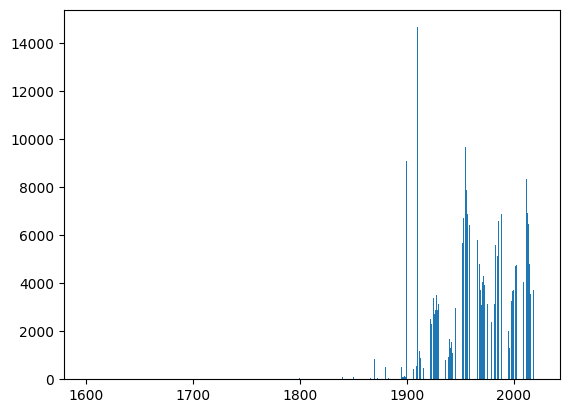

In [127]:
plt.hist(df_Buildings_geo_NAD83[df_Buildings_geo_NAD83['ANNEE_CONS'] != 9999]['ANNEE_CONS'], bins=1000)
plt.show()

In [129]:
# Create full (grid, year-month) combinations
all_year_months = pd.period_range('2015-01', '2025-09', freq='M').astype(str)
grid_ids = fishnet_grid_gdf.index
grid_time_index = pd.MultiIndex.from_product(
    [grid_ids, all_year_months],
    names=['index_right', 'year_month']
)

base_df = pd.DataFrame(index=grid_time_index).reset_index()
base_df

,index_right,year_month
0,0,2015-01
1,0,2015-02
2,0,2015-03
3,0,2015-04
4,0,2015-05
...,...,...
18313,141,2025-05
18314,141,2025-06
18315,141,2025-07
18316,141,2025-08


In [130]:
# Merge fire counts and building attributes
final_df = (
    base_df
    .merge(fire_counts, on=['index_right', 'year_month'], how='left')
    .merge(bld_agg, on='index_right', how='left')
)

# Convert to Period type for sorting and date context
final_df['year_month'] = pd.PeriodIndex(final_df['year_month'], freq='M')

# Replace NaNs (no incidents) with 0
final_df['fire_count'] = final_df['fire_count'].fillna(0).astype(int)

# Join back grid geometry
final_gdf = fishnet_grid_gdf.merge(final_df, left_index=True, right_on='index_right')

final_gdf

,cell_id,row,col,lat,lon,cx_mtm8,cy_mtm8,area_km2,geometry,index_right,year_month,fire_count,num_buildings,avg_floors,median_construction_year
0,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-01,0,42.0,1.214286,1956.0
1,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-02,0,42.0,1.214286,1956.0
2,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-03,0,42.0,1.214286,1956.0
3,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-04,0,42.0,1.214286,1956.0
4,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-05,0,42.0,1.214286,1956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18313,14_16,14,16,45.703322,-73.479398,306404.272745,5.062605e+06,2.753800,"POLYGON ((305461.235 5061824.487, 305461.235 5...",141,2025-05,0,601.0,1.422629,1987.0
18314,14_16,14,16,45.703322,-73.479398,306404.272745,5.062605e+06,2.753800,"POLYGON ((305461.235 5061824.487, 305461.235 5...",141,2025-06,2,601.0,1.422629,1987.0
18315,14_16,14,16,45.703322,-73.479398,306404.272745,5.062605e+06,2.753800,"POLYGON ((305461.235 5061824.487, 305461.235 5...",141,2025-07,0,601.0,1.422629,1987.0
18316,14_16,14,16,45.703322,-73.479398,306404.272745,5.062605e+06,2.753800,"POLYGON ((305461.235 5061824.487, 305461.235 5...",141,2025-08,1,601.0,1.422629,1987.0


In [133]:
final_gdf.shape

(18318, 15)

In [134]:
final_gdf.columns

Index(['cell_id', 'row', 'col', 'lat', 'lon', 'cx_mtm8', 'cy_mtm8', 'area_km2',
       'geometry', 'index_right', 'year_month', 'fire_count', 'num_buildings',
       'avg_floors', 'median_construction_year'],
      dtype='object')

In [135]:
final_gdf['Target_Variable'] = final_gdf['fire_count']>0

In [136]:
final_gdf.head()

,cell_id,row,col,lat,lon,cx_mtm8,cy_mtm8,area_km2,geometry,index_right,year_month,fire_count,num_buildings,avg_floors,median_construction_year,Target_Variable
0,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-01,0,42.0,1.214286,1956.0,False
1,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-02,0,42.0,1.214286,1956.0,False
2,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-03,0,42.0,1.214286,1956.0,False
3,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-04,0,42.0,1.214286,1956.0,False
4,0_1,0,1,45.399943,-73.949352,269620.860919,5.028988e+06,1.259885,"POLYGON ((270461.235 5029324.487, 270461.235 5...",0,2015-05,0,42.0,1.214286,1956.0,False


In [148]:
print(sum(final_gdf['Target_Variable']==True),sum(final_gdf['Target_Variable']==False))

print((final_gdf['Target_Variable']==True).sum(),(final_gdf['Target_Variable']==False).sum())

12296 6022
12296 6022
